In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [4]:
print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [5]:
data = diabetes_dataset['data']
target = diabetes_dataset['target']

In [6]:
# Normalize the target data (this will make clearer training curves)
target = (target - target.mean(axis=0)) / target.std()
target

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(397, 10)
(45, 10)
(397,)
(45,)


### Train a Feedforward Neural Network Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return model

In [9]:
model = get_model()

In [10]:
# Print the Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [11]:
# Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [12]:
# Train the Model, with some of the data reserved for validation
history = model.fit(X_train, y_train, epochs=100, validation_split=0.15, batch_size=64, verbose=2)

Epoch 1/100
6/6 - 0s - loss: 0.9508 - mae: 0.8336 - val_loss: 1.0497 - val_mae: 0.8760
Epoch 2/100
6/6 - 0s - loss: 0.8405 - mae: 0.7869 - val_loss: 0.7791 - val_mae: 0.7579
Epoch 3/100
6/6 - 0s - loss: 0.6163 - mae: 0.6596 - val_loss: 0.5291 - val_mae: 0.5830
Epoch 4/100
6/6 - 0s - loss: 0.5487 - mae: 0.5902 - val_loss: 0.4730 - val_mae: 0.5493
Epoch 5/100
6/6 - 0s - loss: 0.5170 - mae: 0.5813 - val_loss: 0.5537 - val_mae: 0.6248
Epoch 6/100
6/6 - 0s - loss: 0.5246 - mae: 0.5909 - val_loss: 0.4674 - val_mae: 0.5484
Epoch 7/100
6/6 - 0s - loss: 0.4890 - mae: 0.5652 - val_loss: 0.4639 - val_mae: 0.5459
Epoch 8/100
6/6 - 0s - loss: 0.4631 - mae: 0.5408 - val_loss: 0.4798 - val_mae: 0.5624
Epoch 9/100
6/6 - 0s - loss: 0.4577 - mae: 0.5424 - val_loss: 0.4837 - val_mae: 0.5687
Epoch 10/100
6/6 - 0s - loss: 0.4496 - mae: 0.5430 - val_loss: 0.4754 - val_mae: 0.5612
Epoch 11/100
6/6 - 0s - loss: 0.4371 - mae: 0.5276 - val_loss: 0.4758 - val_mae: 0.5511
Epoch 12/100
6/6 - 0s - loss: 0.4418 - ma

Epoch 95/100
6/6 - 0s - loss: 0.0827 - mae: 0.2345 - val_loss: 0.8319 - val_mae: 0.6972
Epoch 96/100
6/6 - 0s - loss: 0.0933 - mae: 0.2450 - val_loss: 0.7850 - val_mae: 0.6788
Epoch 97/100
6/6 - 0s - loss: 0.0579 - mae: 0.1923 - val_loss: 0.8485 - val_mae: 0.6960
Epoch 98/100
6/6 - 0s - loss: 0.0439 - mae: 0.1617 - val_loss: 0.8463 - val_mae: 0.6941
Epoch 99/100
6/6 - 0s - loss: 0.0427 - mae: 0.1618 - val_loss: 0.8473 - val_mae: 0.6909
Epoch 100/100
6/6 - 0s - loss: 0.0290 - mae: 0.1285 - val_loss: 0.8131 - val_mae: 0.6764


In [13]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.5494 - mae: 0.5450


[0.5494046211242676, 0.545042872428894]

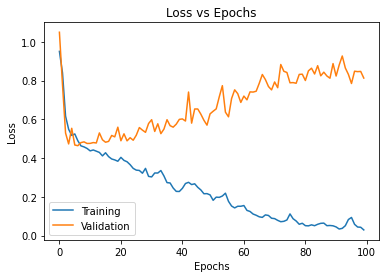

In [14]:
#### Plot the learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

### Model Regularization

In [15]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [16]:
def get_regularized_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer= regularizers.l2(wd), activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer= regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer= regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer= regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer= regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer= regularizers.l2(wd),activation='relu'),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [17]:
model = get_regularized_model(1e-5, 0.3)

In [19]:
model.compile(optimizer='adam', loss='mse', metrics = ['mae'])

In [20]:
history = model.fit(X_train, y_train, validation_split= 0.15, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
6/6 [==============================] - 0s 29ms/step - loss: 0.9810 - mae: 0.8424 - val_loss: 1.1402 - val_mae: 0.8989
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.9690 - mae: 0.8388 - val_loss: 1.1151 - val_mae: 0.8961
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.9310 - mae: 0.8249 - val_loss: 0.9999 - val_mae: 0.8561
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.8293 - mae: 0.7787 - val_loss: 0.7677 - val_mae: 0.7552
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6830 - mae: 0.6992 - val_loss: 0.5730 - val_mae: 0.6193
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6674 - mae: 0.6633 - val_loss: 0.5479 - val_mae: 0.5949
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6090 - mae: 0.6288 - val_loss: 0.5492 - val_mae: 0.6196
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6036 - mae: 0.6452 - va

6/6 [==============================] - 0s 5ms/step - loss: 0.4082 - mae: 0.5160 - val_loss: 0.5466 - val_mae: 0.6073
Epoch 65/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4177 - mae: 0.5222 - val_loss: 0.5509 - val_mae: 0.5817
Epoch 66/100
6/6 [==============================] - 0s 4ms/step - loss: 0.3842 - mae: 0.4881 - val_loss: 0.5441 - val_mae: 0.5799
Epoch 67/100
6/6 [==============================] - 0s 5ms/step - loss: 0.4009 - mae: 0.4946 - val_loss: 0.5356 - val_mae: 0.5791
Epoch 68/100
6/6 [==============================] - 0s 5ms/step - loss: 0.3681 - mae: 0.4724 - val_loss: 0.5382 - val_mae: 0.5821
Epoch 69/100
6/6 [==============================] - 0s 9ms/step - loss: 0.3781 - mae: 0.4878 - val_loss: 0.5367 - val_mae: 0.5787
Epoch 70/100
6/6 [==============================] - 0s 5ms/step - loss: 0.4314 - mae: 0.5251 - val_loss: 0.5467 - val_mae: 0.5910
Epoch 71/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4139 - mae: 0.5077 - val_loss

In [21]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 1000us/step - loss: 0.4077 - mae: 0.5268


[0.40768545866012573, 0.5268418788909912]

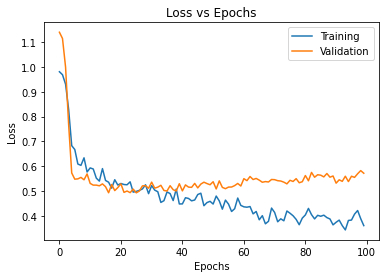

In [22]:
#### Plot the learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()